In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import helper as matt

In [7]:

ipi = matt.read_parquet_by_name('IPI')

In [8]:
# Impute new data
# Add new data for 2025-05-01
new_date = pd.to_datetime('2025-05-01')
new_rows = pd.DataFrame([
    {'date': new_date, 'series': 'abs', 'index': 128.5},
    {'date': new_date, 'series': 'growth_yoy', 'index': 0.3},
    {'date': new_date, 'series': 'growth_mom', 'index': 1.1}
])
ipi = pd.concat([ipi, new_rows], ignore_index=True)


In [9]:
ipi_mom = matt.filter_columns(ipi, 'series', 'growth_mom')
ipi_yoy = matt.filter_columns(ipi, 'series', 'growth_yoy')
ipi_abs = matt.filter_columns(ipi, 'series', 'abs')

In [10]:
ipi_mom_12 = matt.filter_tail(ipi_mom, 'date', 13)
ipi_yoy_12 = matt.filter_tail(ipi_yoy, 'date', 13)

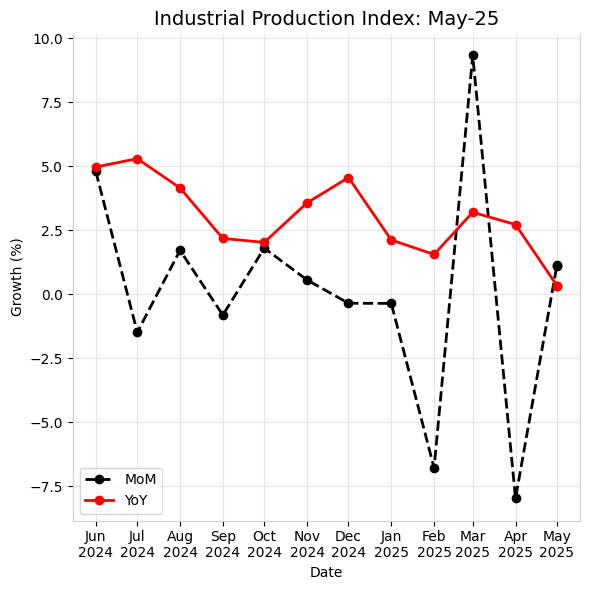

In [11]:
matt.plot_two_lines(ipi_mom_12, 'date', 'index', 'MoM', ipi_yoy_12, 'date', 'index', 'YoY')